In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\dsadm\appdata\local\programs\python\python312\lib\site-packages (3.9.2)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
dados = pd.DataFrame({     #Criando o dataframe
    'Símbolo':['AAPL','Google','MSFT',
               'AMZN','TSLA','FB'],
    'Preço':[150.12,2700.45,300.89,3200.10,700.78,
             350.40],
    'Volume de negociação':[3000000,1000000,2500000,
                            1200000,5000000,900000],
    'Capitalização de mercado':[2000000000000,18000000000000,
                                22000000000000,1700000000000,
                                75000000000000,9000000000000]
})

Text(0.5, 1.0, 'Analisando o preço das ações')

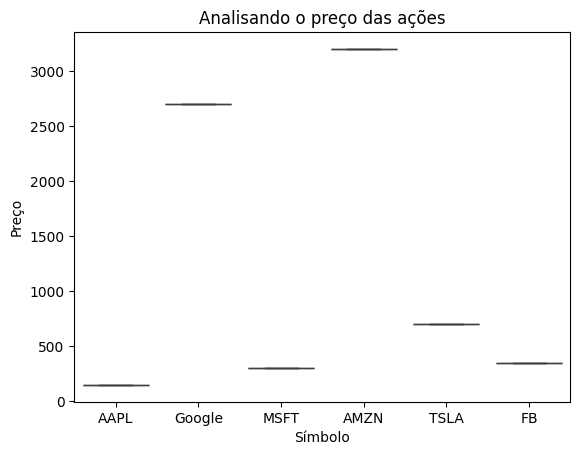

In [8]:
# Plotando o boxplot
sns.boxplot(x= dados['Símbolo'],y=dados['Preço'])
plt.title('Analisando o preço das ações')

In [9]:

dados.describe() # descreve os dados de forma estatistica

,Preço,Volume de negociação,Capitalização de mercado
count,6.000000,6.000000e+00,6.000000e+00
mean,1233.790000,2.266667e+06,2.128333e+13
std,1351.043094,1.592064e+06,2.757901e+13
min,150.120000,9.000000e+05,1.700000e+12
25%,313.267500,1.050000e+06,3.750000e+12
50%,525.590000,1.850000e+06,1.350000e+13
75%,2200.532500,2.875000e+06,2.100000e+13
max,3200.100000,5.000000e+06,7.500000e+13


In [10]:
dados.info() # Exibe as informações da base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Símbolo                   6 non-null      object 
 1   Preço                     6 non-null      float64
 2   Volume de negociação      6 non-null      int64  
 3   Capitalização de mercado  6 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 324.0+ bytes


In [11]:
# transforma a coluna de simbolos em true ou falso
dados_ativos = pd.get_dummies(dados,columns=['Símbolo']) 

In [12]:

dados_ativos

,Preço,Volume de negociação,Capitalização de mercado,Símbolo_AAPL,Símbolo_AMZN,Símbolo_FB,Símbolo_Google,Símbolo_MSFT,Símbolo_TSLA
0,150.12,3000000,2000000000000,True,False,False,False,False,False
1,2700.45,1000000,18000000000000,False,False,False,True,False,False
2,300.89,2500000,22000000000000,False,False,False,False,True,False
3,3200.10,1200000,1700000000000,False,True,False,False,False,False
4,700.78,5000000,75000000000000,False,False,False,False,False,True
5,350.40,900000,9000000000000,False,False,True,False,False,False


In [13]:

# aplicando o Kmeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(dados_ativos)

KMeans(n_clusters=6)

In [14]:
sse = kmeans.inertia_
print('SSE',sse)

SSE 0.0


In [15]:

# Visualizando o resultado dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0, 0.5, 'Preço das ações')

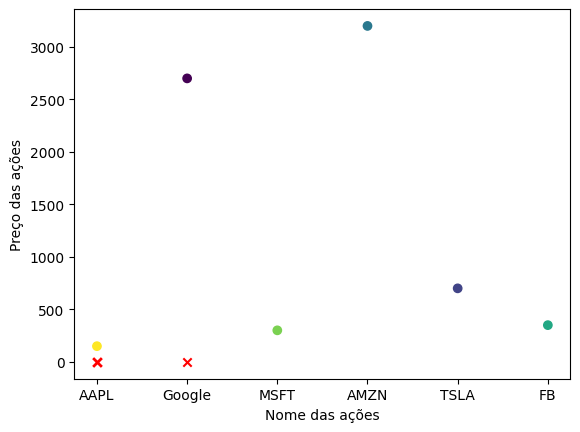

In [16]:

plt.scatter(dados['Símbolo'],dados['Preço'],c =labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')
plt.xlabel('Nome das ações')
plt.ylabel('Preço das ações')

In [17]:

# Analisando os outros grupos restantes
dados_ativos['Grupo'] = labels
grouped_data = dados_ativos.groupby('Grupo').mean()
print(grouped_data)

         Preço  Volume de negociação  Capitalização de mercado  Símbolo_AAPL  \
Grupo                                                                          
0      2700.45             1000000.0              1.800000e+13           0.0   
1       700.78             5000000.0              7.500000e+13           0.0   
2      3200.10             1200000.0              1.700000e+12           0.0   
3       350.40              900000.0              9.000000e+12           0.0   
4       300.89             2500000.0              2.200000e+13           0.0   
5       150.12             3000000.0              2.000000e+12           1.0   

       Símbolo_AMZN  Símbolo_FB  Símbolo_Google  Símbolo_MSFT  Símbolo_TSLA  
Grupo                                                                        
0               0.0         0.0             1.0           0.0           0.0  
1               0.0         0.0             0.0           0.0           1.0  
2               1.0         0.0             0.0

In [18]:

def avaliacao(dados_ativos):
    inercia = []
    silhueta = []

In [20]:

def avaliacao(dados_ativos):
    inercia = []
    silhueta = []

    for k in range(2,5):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados_ativos)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - '+ str(silhouette_score(dados_ativos, kmeans.predict(dados_ativos))))
        
    return silhueta, inercia

In [23]:
silhueta, inercia = avaliacao(dados_ativos)
silhueta

['k=2 - 0.6824157930514535',
 'k=3 - 0.5706457225543075',
 'k=4 - 0.5273183690989312']

In [22]:
from sklearn.metrics import silhouette_score

In [24]:
# analisando a metrica inercia
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,5),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

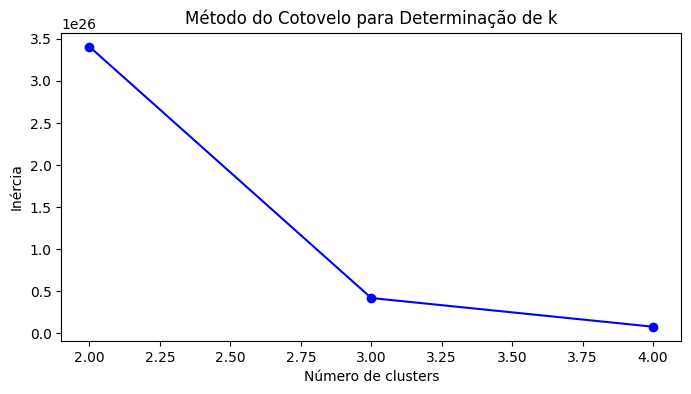

In [25]:
plot_cotovelo(inercia)

In [26]:
# Grafico da silhueta dos agrupamentos 
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados_n):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados_ativos)
    
    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados_ativos, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')
    
    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados_ativos, cluster_previsoes)
    
    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    
    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados_n) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()
        
        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i
        
        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra, 
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos
        
    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')
        
    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')
    
    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])
    
    plt.show()

Valor médio para 3 clusters: 0.571


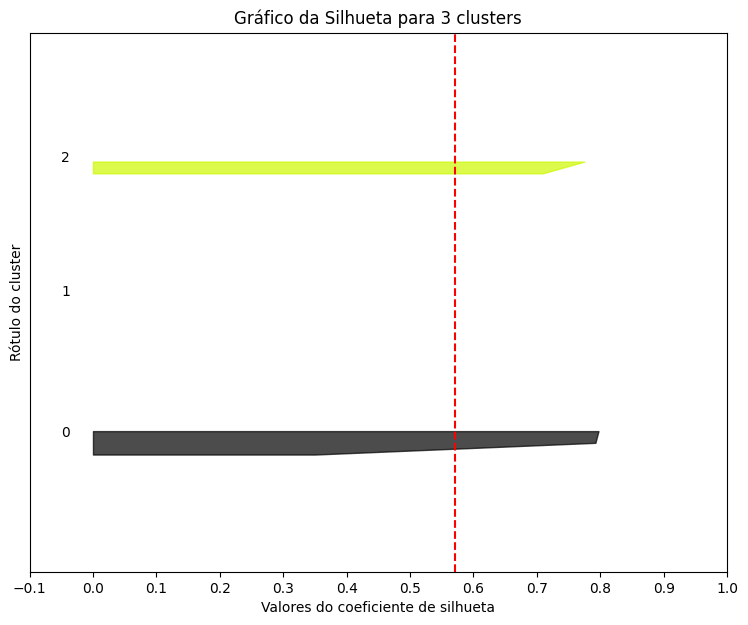

In [27]:

graf_silhueta(3,dados_ativos)

In [28]:
 #Bibliotecas para plotar o gráfico em 3d
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Capitalização de mercado')

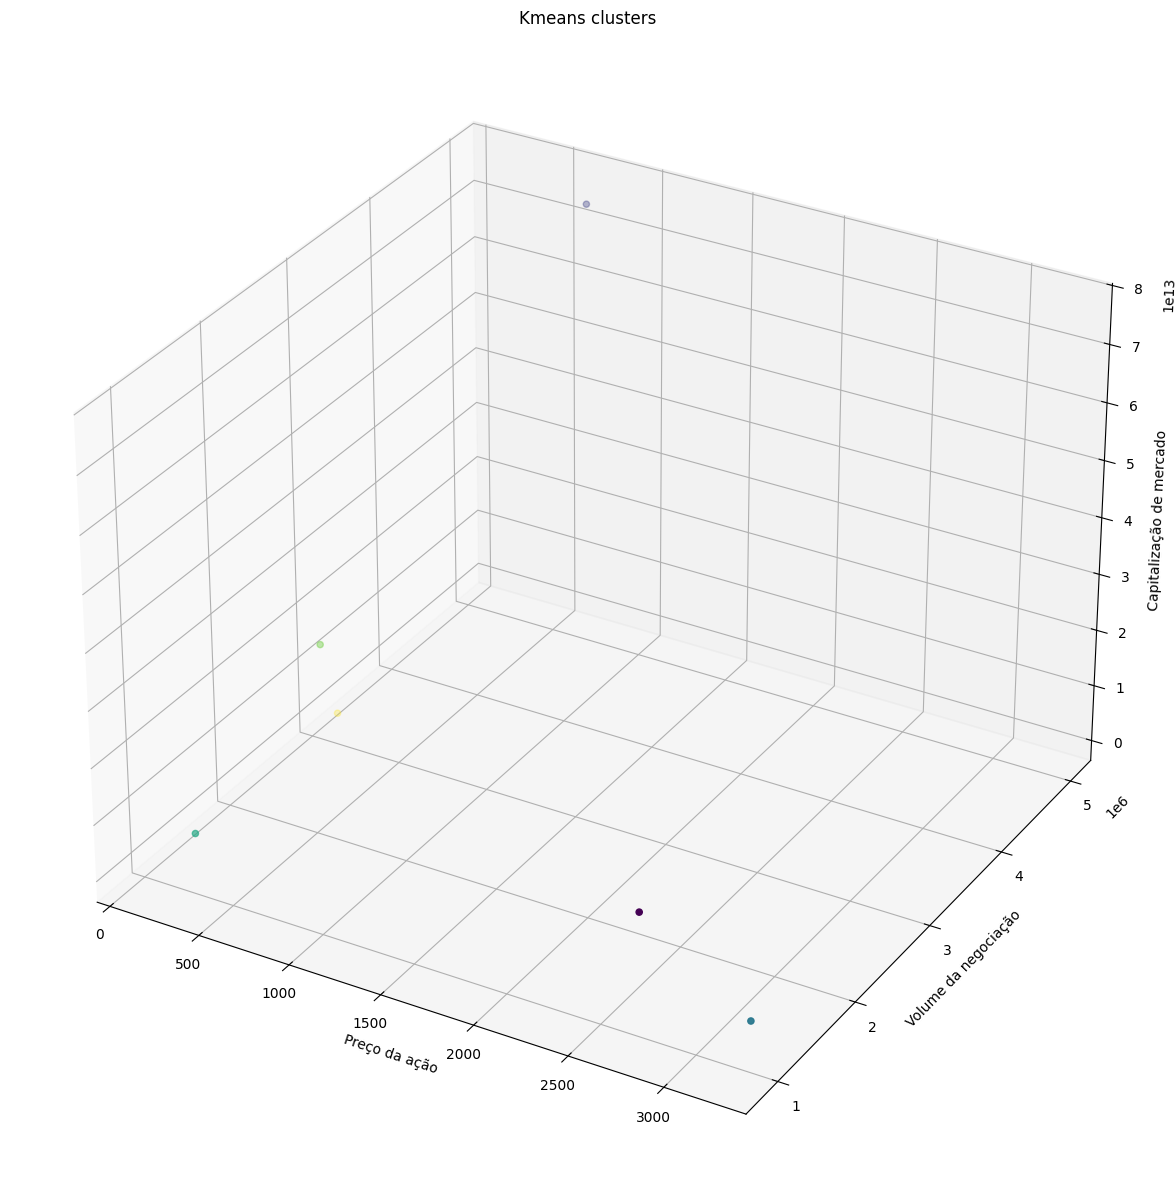

In [29]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(dados['Preço'],dados['Volume de negociação'],
           dados['Capitalização de mercado'],c=labels)
ax.set_title('Kmeans clusters')
ax.set_xlabel('Preço da ação')
ax.set_ylabel('Volume da negociação')
ax.set_zlabel('Capitalização de mercado')